# Mount google drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd /content/drive/MyDrive/Colab Notebooks/quantitative_trading

# Install

In [3]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 12.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
! pip install backtrader backtrader_plotting

     |████████████████████████████████| 410 kB 5.1 MB/s 
     |████████████████████████████████| 60 kB 6.6 MB/s 


In [5]:
! pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-aygujuji
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-aygujuji
     |████████████████████████████████| 52 kB 973 kB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75774 sha256=c92150a15819c1004d86cceb52cbf648137ea4dcf550fba62ff898d31fef209c
  Stored in directory: /tmp/pip-ephem-wheel-cache-znvf343m/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=d70e121ac011d0a2488747e63664cf9f19f2edfeb11afa25a62c4a0bb87f1109
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


# Import modules

In [7]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime 
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import backtrader as bt
from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo
import pyfolio as pf

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
# pandas_datareader

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# Get data

In [8]:
# Request historical data
data = yf.Ticker("NVDA").history(period='max')
data

Open        High         Low       Close       Volume  \
Date                                                                      
1999-01-22    0.401851    0.448494    0.356404    0.376735  271468800.0   
1999-01-25    0.406635    0.420987    0.376735    0.416203   51048000.0   
1999-01-26    0.420987    0.429359    0.377931    0.383912   34320000.0   
1999-01-27    0.385108    0.394676    0.363579    0.382716   24436800.0   
1999-01-28    0.382716    0.385108    0.379127    0.381520   22752000.0   
...                ...         ...         ...         ...          ...   
2022-03-21  265.070007  271.519989  259.670013  267.339996   59172700.0   
2022-03-22  267.269989  272.380005  260.720001  265.239990   54700700.0   
2022-03-23  261.260010  266.119995  255.750000  256.339996   50212000.0   
2022-03-24  261.660004  283.200012  259.070007  281.500000   87737900.0   
2022-03-25  278.859985  283.579987  272.709991  276.920013   57847200.0   

            Dividends  Stock Splits  
Date                                 
1999-01-22        0.0           0.0  
1999-01-25        0.0           0.0  
1999-01-26        0.0           0.0  
1999-01-27        0.0           0.0  
1999-01-28        0.0           0.0  
...               ...           ...  
2022-03-21        0.0           0.0  
2022-03-22        0.0           0.0  
2022-03-23        0.0           0.0  
2022-03-24        0.0           0.0  
2022-03-25        0.0           0.0  

[5834 rows x 7 columns]

In [9]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object

# Backtesting

In [10]:
data = bt.feeds.PandasData(dataname=yf.download('9449.T', '2010-01-01', '2021-12-01'))
print("type:", type(data))
print("data:", data)
data.__dict__

[*********************100%***********************]  1 of 1 completed
type: <class 'backtrader.feeds.pandafeed.PandasData'>
data: <backtrader.feeds.pandafeed.PandasData object at 0x7f446d5eb5d0>


{'_barstack': deque([]),
 '_barstash': deque([]),
 '_colmapping': {'close': 'Close',
  'datetime': None,
  'high': 'High',
  'low': 'Low',
  'open': 'Open',
  'openinterest': None,
  'volume': 'Volume'},
 '_compression': 1,
 '_dataname':               Open    High     Low   Close    Adj Close  Volume
 Date                                                           
 2010-01-04   375.0   380.0   373.0   376.0   299.458252  102300
 2010-01-05   380.0   380.0   376.0   377.0   300.254639  127600
 2010-01-06   377.0   380.0   375.0   378.0   301.051086  175000
 2010-01-07   379.0   379.0   375.0   376.0   299.458252  200400
 2010-01-08   376.0   378.0   375.0   375.0   298.661835  156200
 ...            ...     ...     ...     ...          ...     ...
 2021-11-25  3005.0  3020.0  2961.0  2967.0  2953.518311  359300
 2021-11-26  2933.0  2951.0  2901.0  2922.0  2908.722900  263600
 2021-11-29  2873.0  2935.0  2854.0  2856.0  2843.022705  381100
 2021-11-30  2926.0  2980.0  2856.0  2858.0  284

In [11]:
class TradeClosed(bt.analyzers.Analyzer):
    """
    Analyzer returning closed trade information.
    """

    def start(self):
        super(TradeClosed, self).start()

    def create_analysis(self):
        self.rets = {}
        self.vals = tuple()

    def notify_trade(self, trade):
        """Receives trade notifications before each next cycle"""
        if trade.isclosed:
            self.vals = (
                self.strategy.datetime.datetime(),
                trade.data._name,
                round(trade.pnl, 2),
                round(trade.pnlcomm, 2),
                trade.commission,
                # trade.baropen,trade.barclose,
                (trade.dtclose - trade.dtopen),
                trade.status
            )
            self.rets[trade.ref] = self.vals
    def get_analysis(self):
        return self.rets

In [52]:
class SimpleMeanReversion(bt.Strategy):
 
    '''
    This is a simple mean reversion bollinger band strategy.
 
    Entry Critria:
        - Long:
            - Price closes below the lower band
            - Stop Order entry when price crosses back above the lower band
        - Short:
            - Price closes above the upper band
            - Stop order entry when price crosses back below the upper band
    Exit Critria
        - Long/Short: Price touching the median line
    '''
 
    params = dict(
        period=20,
        devfactor=2,
        size=1
        )
 
    def __init__(self):
        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor)
        #self.sx = bt.indicators.CrossDown(self.data.close, self.boll.lines.top)
        #self.lx = bt.indicators.CrossUp(self.data.close, self.boll.lines.bot)
 
    def next(self):
        orders = self.broker.get_orders_open() 
        # Cancel open orders so we can track the median line
        if orders:
            for order in orders:
                self.broker.cancel(order)
 
        if not self.position:
            if self.data.close > self.boll.lines.top:
                self.sell(exectype=bt.Order.Stop, price=self.boll.lines.top[0], size=self.p.size)
            if self.data.close < self.boll.lines.bot:
                self.buy(exectype=bt.Order.Stop, price=self.boll.lines.bot[0], size=self.p.size)
        else:
            if self.position.size > 0:
                self.sell(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)
 
            else:
                self.buy(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)
 
    def notify_trade(self,trade):
        if trade.isclosed:
            dt = self.data.datetime.date()

In [21]:
class SmaCrossUp(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        fast_sma = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        slow_sma = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        # self.crossup = bt.ind.CrossUp(fast_sma, slow_sma)  # crossup signal
        # self.crossdown = bt.ind.CrossDown(fast_sma, slow_sma)  # crossdown signal
        self.crossover = bt.ind.CrossOver(fast_sma, slow_sma)  # crossover signal

class SmaCrossUpStopLoss(SmaCrossUp):
    # Ref: https://www.backtrader.com/blog/posts/2018-02-01-stop-trading/stop-trading/
    params = dict(
        stop_loss=0.02,  # price is 2% less than the entry point
        trail=False,
        buy_limit=False,
    )

    buy_order = None  # default value for a potential buy_order

    def notify_order(self, order):
        if order.status == order.Cancelled:
            print('CANCEL@price: {:.2f} {}'.format(
                order.executed.price, 'buy' if order.isbuy() else 'sell'))
            return

        if not order.status == order.Completed:
            return  # discard any other notification

        if not self.position:  # we left the market
            print('SELL@price: {:.2f}'.format(order.executed.price))
            return

        # We have entered the market
        print('BUY @price: {:.2f}'.format(order.executed.price))

    def next(self):
        if not self.position and self.crossover > 0:
            if self.buy_order:  # something was pending
                self.cancel(self.buy_order)

            # not in the market and signal triggered
            if not self.p.buy_limit:
                self.buy_order = self.buy(transmit=False)
            else:
                price = self.data.close[0] * (1.0 - self.p.buy_limit)

                # transmit = False ... await child order before transmission
                self.buy_order = self.buy(price=price, exectype=bt.Order.Limit,
                                          transmit=False)
        
            # Setting parent=buy_order ... sends both together
            if not self.p.trail:
                stop_price = self.data.close[0] * (1.0 - self.p.stop_loss)
                self.sell(exectype=bt.Order.Stop, price=stop_price,
                          parent=self.buy_order)
            else:
                self.sell(exectype=bt.Order.StopTrail,
                          trailamount=self.p.trail,
                          parent=self.buy_order)
        # elif self.crossover < 0:
        #     self.close()

In [22]:
class SmaCrossOver(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        fast_sma = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        slow_sma = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(fast_sma, slow_sma)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

class EmaSmaCrossOver(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        fast_ema = bt.ind.EMA(period=self.p.pfast)  # fast moving average
        slow_sma = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(fast_ema, slow_sma)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

class EmaCrossOver(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        fast_ema = bt.ind.EMA(period=self.p.pfast)  # fast moving average
        slow_ema = bt.ind.EMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(fast_ema, slow_ema)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

In [15]:
# set up engine
cerebro = bt.Cerebro(optreturn=False)

# add strategy
# cerebro.addstrategy(SmaCrossOver) # SmaCrossOver, SimpleMeanReversion, SmaCrossUpStopLoss
cerebro.optstrategy(SmaCrossOver, pfast=range(9,10), pslow=range(20,30))

# download data and add to backtest system
data = bt.feeds.PandasData(dataname=yf.download('AAPL', '2010-01-01', '2021-12-01'))
# data = bt.feeds.PandasData(dataname=yf.download('9449.T', '2010-01-01', '2021-12-01'))
# data = bt.feeds.PandasData(dataname=yf.download('TOP.BK', '2020-01-01', '2021-12-31'))
# data = bt.feeds.PandasData(dataname=yf.download('KBANK.BK', '2020-01-01', '2021-12-31'))
# data = bt.feeds.PandasData(dataname=yf.download('^N225', '2020-01-01', '2021-12-31'))

cerebro.adddata(data, name="test")

# set cash
cerebro.broker.setcash(10000.0)

# set commission
cerebro.broker.setcommission(commission=0.001) # 0.001 => 0.1%

# set slippage
cerebro.broker.set_slippage_perc(0.000)  # 0.005 => 0.5%
# cerebro.broker.set_slippage_perc(0.005, slip_open=True)  # 0.005 => 0.5%
# set_slippage_perc(perc, slip_open=True, slip_limit=True, slip_match=True, slip_out=False)

# add analyser
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
cerebro.addanalyzer(TradeClosed, _name="trade_closed")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")    
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analyser")    

# print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# run backtest
opt_runs = cerebro.run()

startcash = 10000.0
# Generate results list
final_results_list = []
for run in opt_runs:
    for strategy in run:
        value = round(strategy.broker.get_value(),2)
        PnL = round(value - startcash,2)
        pfast = strategy.params.pfast
        pslow = strategy.params.pslow
        final_results_list.append([pfast,pslow,PnL])

#Sort Results List
by_period = sorted(final_results_list, key=lambda x: x[0])
by_PnL = sorted(final_results_list, key=lambda x: x[2], reverse=True)

#Print results
print('Results: Ordered by period:')
for result in by_period:
    print('pfast: {}, pslow: {}, PnL: {}'.format(result[0], result[1], result[2]))
print('Results: Ordered by Profit:')
for result in by_PnL:
    print('pfast: {}, pslow: {}, PnL: {}'.format(result[0], result[1], result[2]))

# print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 10000.00
Results: Ordered by period:
pfast: 9, pslow: 20, PnL: 131.51
pfast: 9, pslow: 21, PnL: 124.57
pfast: 9, pslow: 22, PnL: 127.54
pfast: 9, pslow: 23, PnL: 129.14
pfast: 9, pslow: 24, PnL: 122.26
pfast: 9, pslow: 25, PnL: 122.65
pfast: 9, pslow: 26, PnL: 133.0
pfast: 9, pslow: 27, PnL: 125.96
pfast: 9, pslow: 28, PnL: 124.93
pfast: 9, pslow: 29, PnL: 118.34
Results: Ordered by Profit:
pfast: 9, pslow: 26, PnL: 133.0
pfast: 9, pslow: 20, PnL: 131.51
pfast: 9, pslow: 23, PnL: 129.14
pfast: 9, pslow: 22, PnL: 127.54
pfast: 9, pslow: 27, PnL: 125.96
pfast: 9, pslow: 28, PnL: 124.93
pfast: 9, pslow: 21, PnL: 124.57
pfast: 9, pslow: 25, PnL: 122.65
pfast: 9, pslow: 24, PnL: 122.26
pfast: 9, pslow: 29, PnL: 118.34
Final Portfolio Value: 10000.00


In [16]:
df_result = pd.DataFrame(final_results_list, columns=["fast","slow","PnL"])
df_result

fast  slow     PnL
0     9    20  131.51
1     9    21  124.57
2     9    22  127.54
3     9    23  129.14
4     9    24  122.26
5     9    25  122.65
6     9    26  133.00
7     9    27  125.96
8     9    28  124.93
9     9    29  118.34

In [84]:
# set up engine
cerebro = bt.Cerebro()

# add strategy
cerebro.addstrategy(SmaCrossOver) # SmaCrossOver, SimpleMeanReversion, SmaCrossUpStopLoss

# download data and add to backtest system
# data = bt.feeds.PandasData(dataname=yf.download('AAPL', '2010-01-01', '2021-12-01'))
data = bt.feeds.PandasData(dataname=yf.download('9449.T', '2010-01-01', '2021-12-01'))
# data = bt.feeds.PandasData(dataname=yf.download('5269.T', '2010-01-01', '2021-12-01'))
# data = bt.feeds.PandasData(dataname=yf.download('AMZN', '2010-01-01', '2021-12-01'))

# data = bt.feeds.PandasData(dataname=yf.download('TOP.BK', '2020-01-01', '2021-12-31'))
# data = bt.feeds.PandasData(dataname=yf.download('KBANK.BK', '2020-01-01', '2021-12-31'))
# data = bt.feeds.PandasData(dataname=yf.download('^N225', '2020-01-01', '2021-12-31'))

cerebro.adddata(data, name="test")

# set cash
cerebro.broker.setcash(1000.0)

# set commission
cerebro.broker.setcommission(commission=0.001) # 0.001 => 0.1%

# set slippage
cerebro.broker.set_slippage_perc(0.005)  # 0.005 => 0.5%
# cerebro.broker.set_slippage_perc(0.005, slip_open=True)  # 0.005 => 0.5%
# set_slippage_perc(perc, slip_open=True, slip_limit=True, slip_match=True, slip_out=False)

# add analyser
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
cerebro.addanalyzer(TradeClosed, _name="trade_closed")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")    
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analyser")    

# print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# run backtest
results = cerebro.run()

# analyse portfolio
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()

# print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 1000.00
Final Portfolio Value: 3286.39


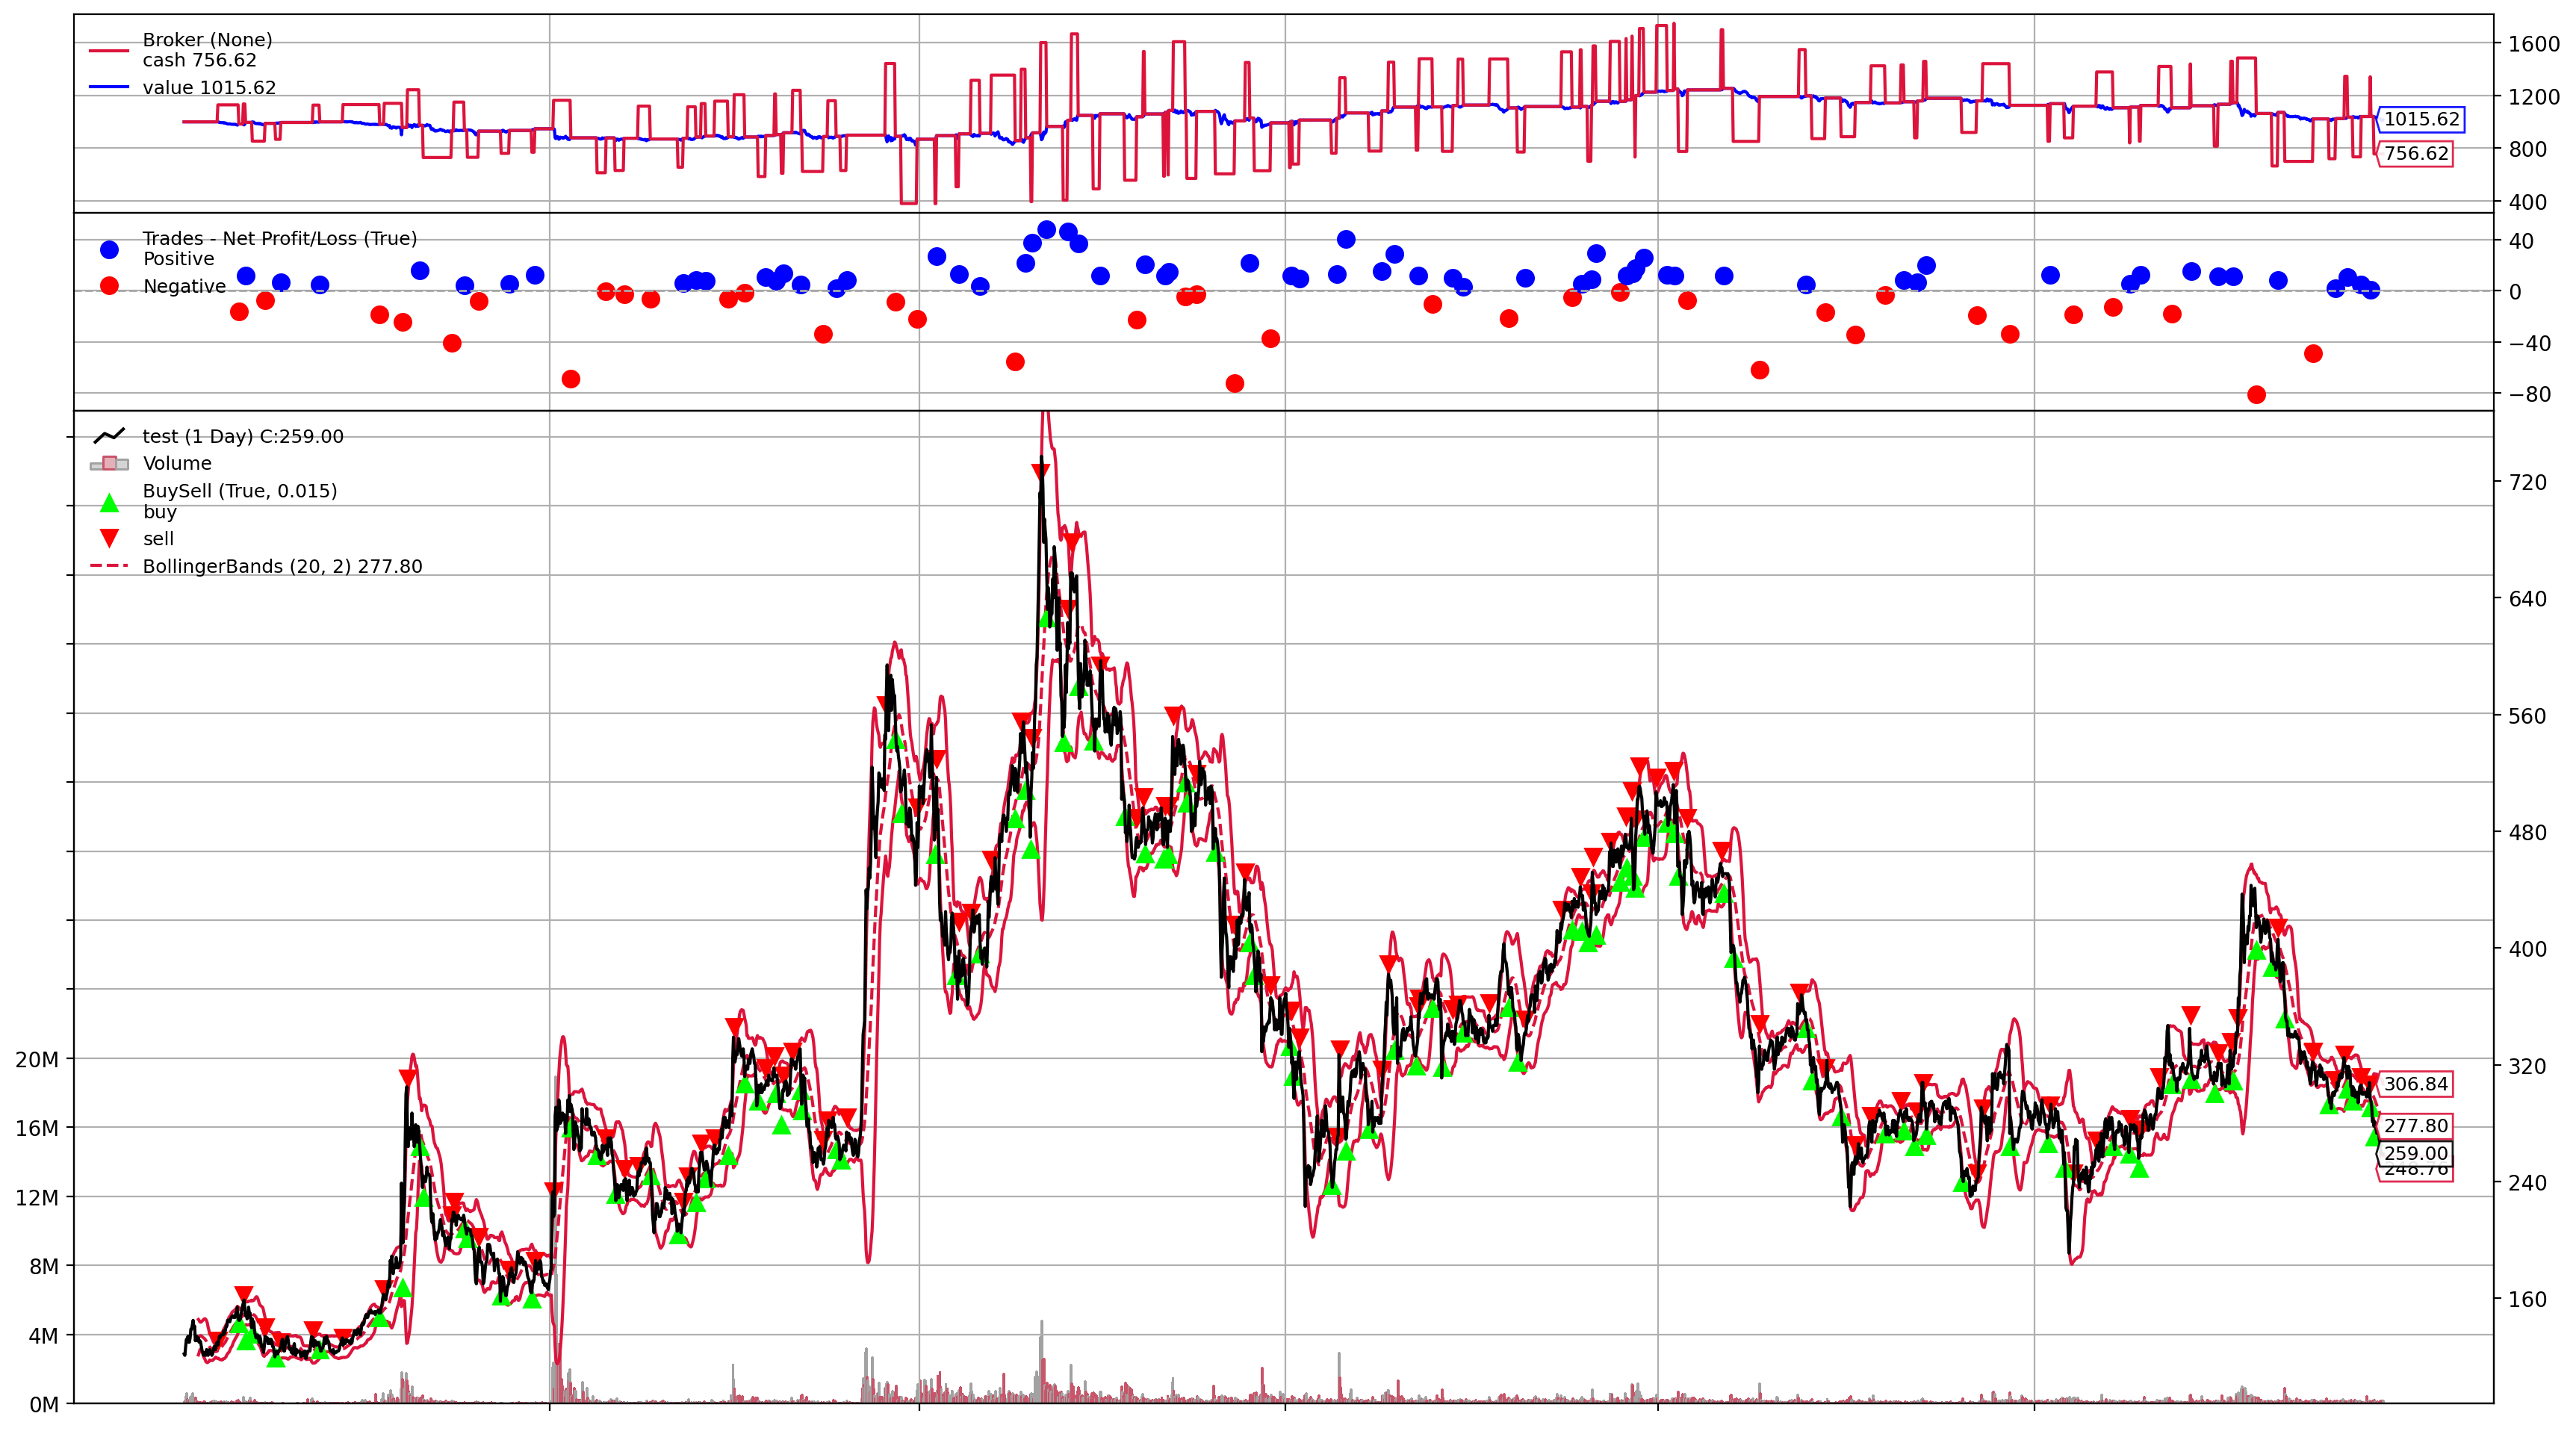

[[<Figure size 3600x2000 with 4 Axes>]]

In [77]:
plt.rcParams['figure.figsize']=[18, 10]
plt.rcParams['figure.dpi']=200
cerebro.plot(iplot=False)

In [30]:
# plot backtest results
b = Bokeh(style='bar', plot_mode='single', scheme=Tradimo())
cerebro.plot(b)

[[<backtrader_plotting.bokeh.bokeh.FigurePage at 0x7f4467099b50>]]

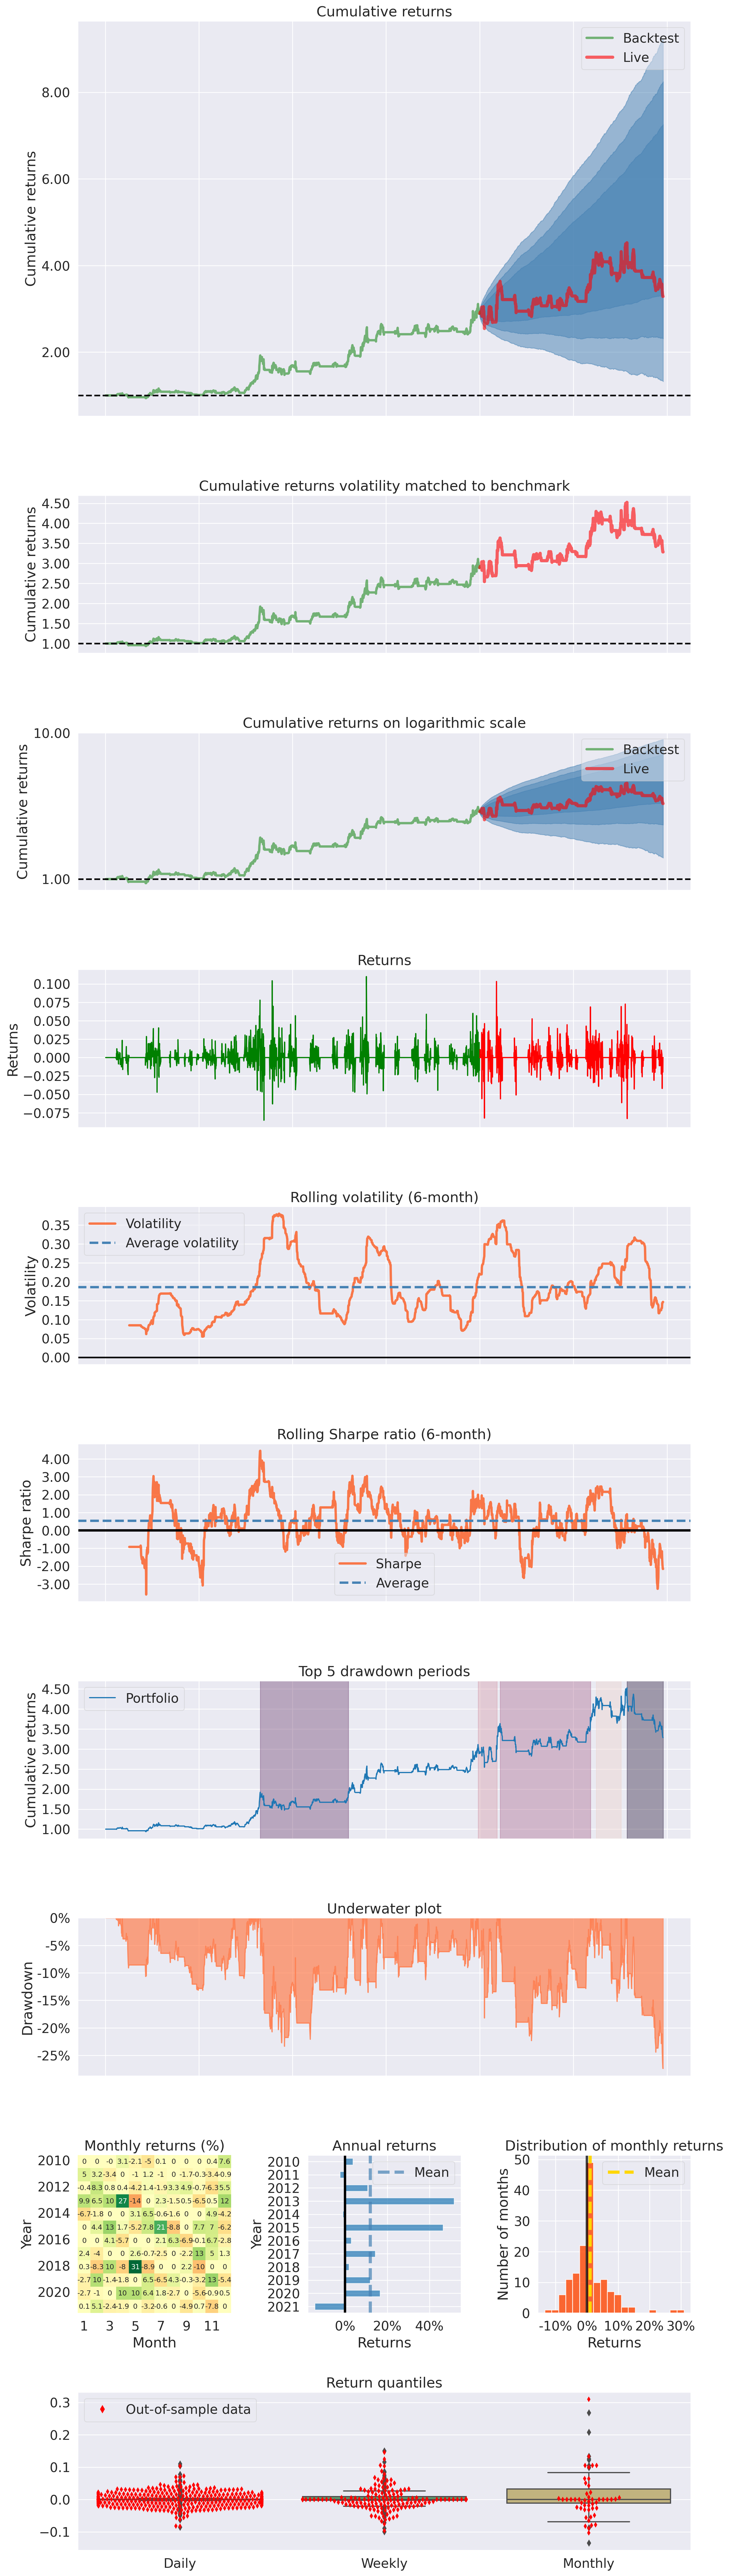

In [85]:
fig = pf.create_returns_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    # gross_lev=gross_lev,
    live_start_date='2018-01-01',  # This date is for starting out-of-sample
    # round_trips=True,
    return_fig=True
    )

In [83]:
# show portfolio
portfolio = pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    # gross_lev=gross_lev,
    live_start_date='2018-01-01',  # This date is for starting out-of-sample
    # round_trips=True
    )
print(type(portfolio))
# portfolio

Output hidden; open in https://colab.research.google.com to view.

# testing

In [ ]:
trade_dict = strat.analyzers.getbyname("trade_closed").get_analysis()
columns_df = [
        "Date Closed",
        "Ticker",
        "PnL",
        "PnL Comm",
        "Commission",
        "Days Open",
    ]
df = pd.DataFrame(trade_dict)
df = df.T
# df.columns = columns_df
df.head()

In [ ]:
trade_analyser = strat.analyzers.getbyname("trade_analyser").get_analysis()
trade_analyser.keys()

In [ ]:
positions = positions.reset_index()   
# df_position = df_position.rename(columns={'test': 'value'})
positions.tail()

In [ ]:
# strat.analyzers.getbyname('pyfolio').get_analysis().DrawDown()

In [ ]:
analyse = strat.analyzers.getbyname('pyfolio').get_analysis()
analyse.keys

In [ ]:
cerebro.__dict__

In [ ]:
inds = strat.getindicators()

In [ ]:
strat.getindicators_lines()[0].array[:]
strat.getindicators_lines()[0]._getlines()

In [ ]:
print(strat.getindicators_lines()[0].array.tolist())
print(strat.getindicators_lines()[1].array.tolist())
print(strat.getindicators_lines()[2].array.tolist())
print(strat.getindicators_lines()[0]._getlines()[0])
len(strat.getindicators_lines())

In [ ]:
strat.getindicators_lines()[0].params._getvalues()

In [ ]:
# raw data
open = strat.data_open.array
high = strat.data_high.array

# trades
trades = [str(trade).splitlines() for trade in list(strat._trades.values())[0][0]]

# orders
orders = [str(order).splitlines() for order in strat._orders]

In [ ]:
# plt.plot(strat.analyzers.getbyname('pyfolio').data0_volume.array)
list(strat.analyzers.getbyname('pyfolio').__dict__.keys())

In [ ]:
strat.analyzers.getbyname('pyfolio').datas[0]._dataname.reset_index()

In [ ]:
strat.analyzers.getbyname('pyfolio').__dict__.keys()

In [ ]:
return_ordereddict = strat.analyzers.getbyname('pyfolio')._returns.rets
df_return = pd.DataFrame.from_dict(return_ordereddict, orient="index").reset_index()
df_return = df_return.rename(columns={"index":"date", 0:"returns"})
df_return

In [ ]:
df_rawdata = strat.analyzers.getbyname('pyfolio').datas[0]._dataname.reset_index()
df_rawdata.head()

In [ ]:
df_return.count(), df_rawdata.count()

In [ ]:
list(strat.analyzers.getbyname('pyfolio').strategy.__dict__.keys())

In [ ]:
# strat.analyzers.getbyname('pyfolio').strategy.boll.lines.lines[0].array
strat.analyzers.getbyname('pyfolio').strategy.lines.lines[0].array

In [ ]:
strat.analyzers.getbyname('pyfolio').strategy.line

In [ ]:
# strat.analyzers.getbyname('pyfolio').strategy._trades

In [ ]:
type(strat.analyzers.getbyname('pyfolio')._transactions.rets)
transactions_ordereddictlist = strat.analyzers.getbyname('pyfolio')._transactions.rets
df_transactions = pd.DataFrame(transactions_ordereddictlist, columns=transactions_ordereddictlist.keys())
df_transactions = df_transactions.explode(list(df_transactions.columns)).T.reset_index()
df_transactions.columns = df_transactions.iloc[0]
df_transactions = df_transactions[1:]
df_transactions

In [ ]:
df_transactions.price

In [ ]:
strat.analyzers.getbyname('pyfolio').data_datetime.array

# Unmount and flush google drive

In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()